In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype=object)

In [4]:
df = df.drop(['Unnamed: 32'], axis=1)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis)
df.diagnosis.unique()

array([1, 0])

In [77]:
df.drop('id', axis=1).describe().T.style.bar(color='#d65f5f')

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000000,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


# Data Analysis

## Trick 1

refer to: https://www.kaggle.com/rukayaamzat/97-accuracy-cancer-prediction-with-pipeline

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Text(0.5, 1.0, 'Correlation Map')

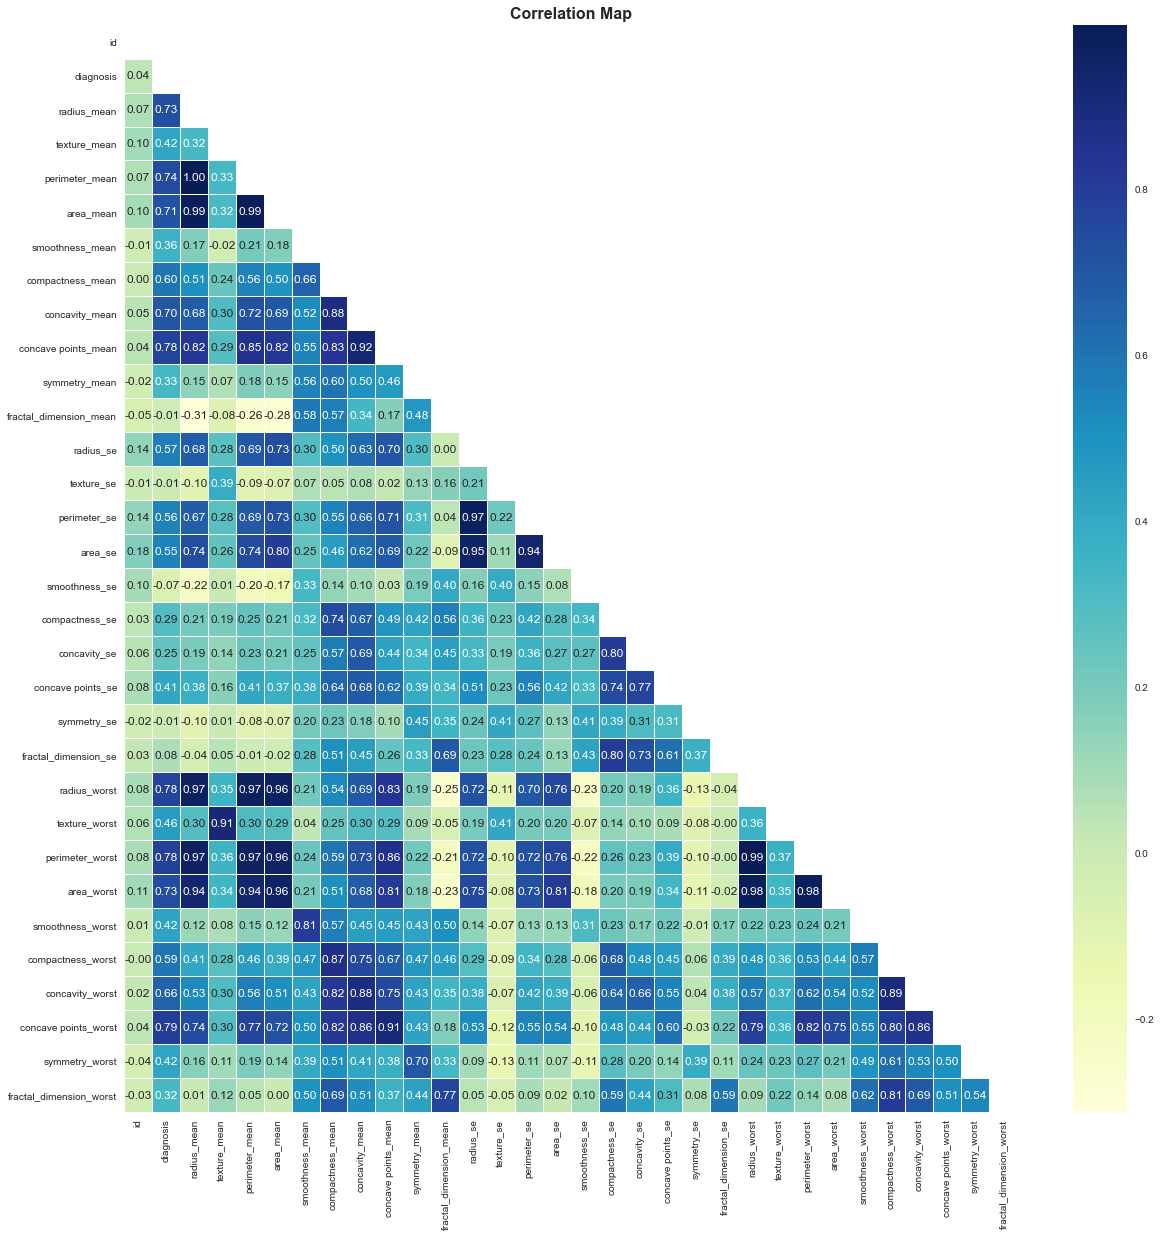

In [74]:
corr = df.corr()
plt.figure(figsize=(20,20))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1,  cmap='YlGnBu', annot = True, fmt = ".2f")


plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [10]:
corr['diagnosis']

id                         0.039769
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0

In [11]:
corr[abs(corr['diagnosis']) > 0.60].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

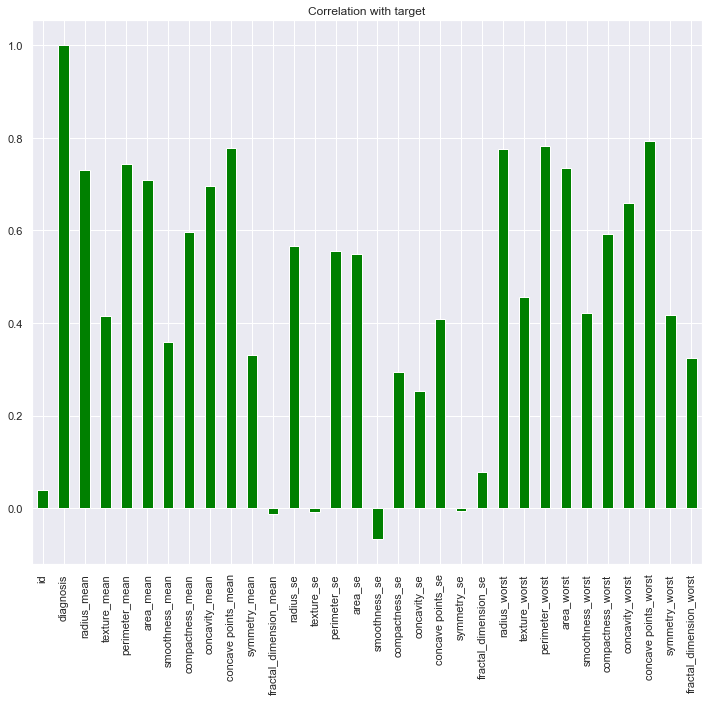

In [12]:
corr['diagnosis'].plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

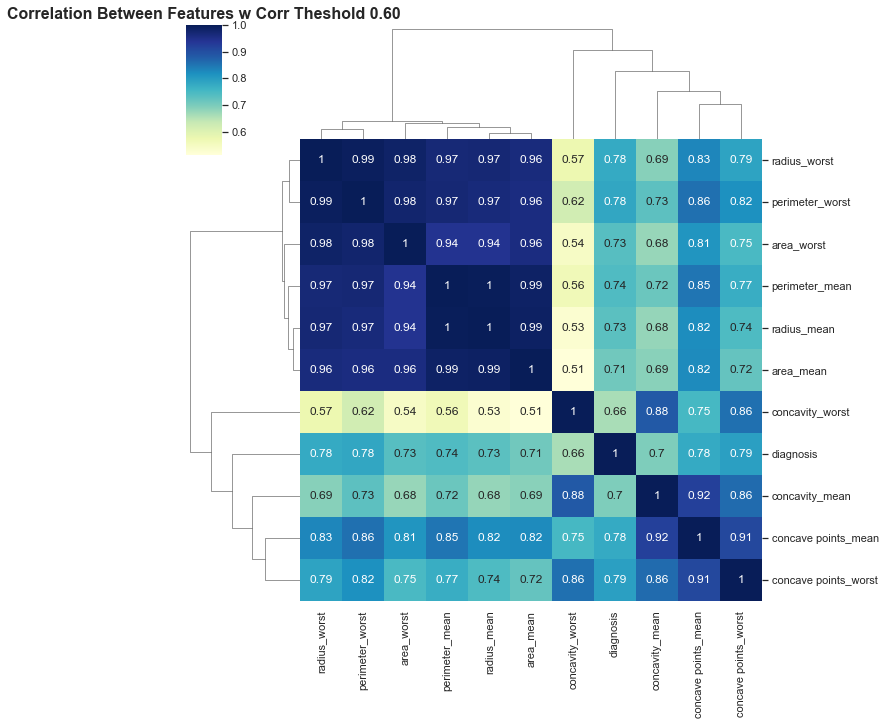

In [13]:
threshold = 0.60 
filtre = np.abs(corr["diagnosis"]) > threshold
corr_features = corr.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.60", fontweight = "bold", fontsize=16)
plt.show()

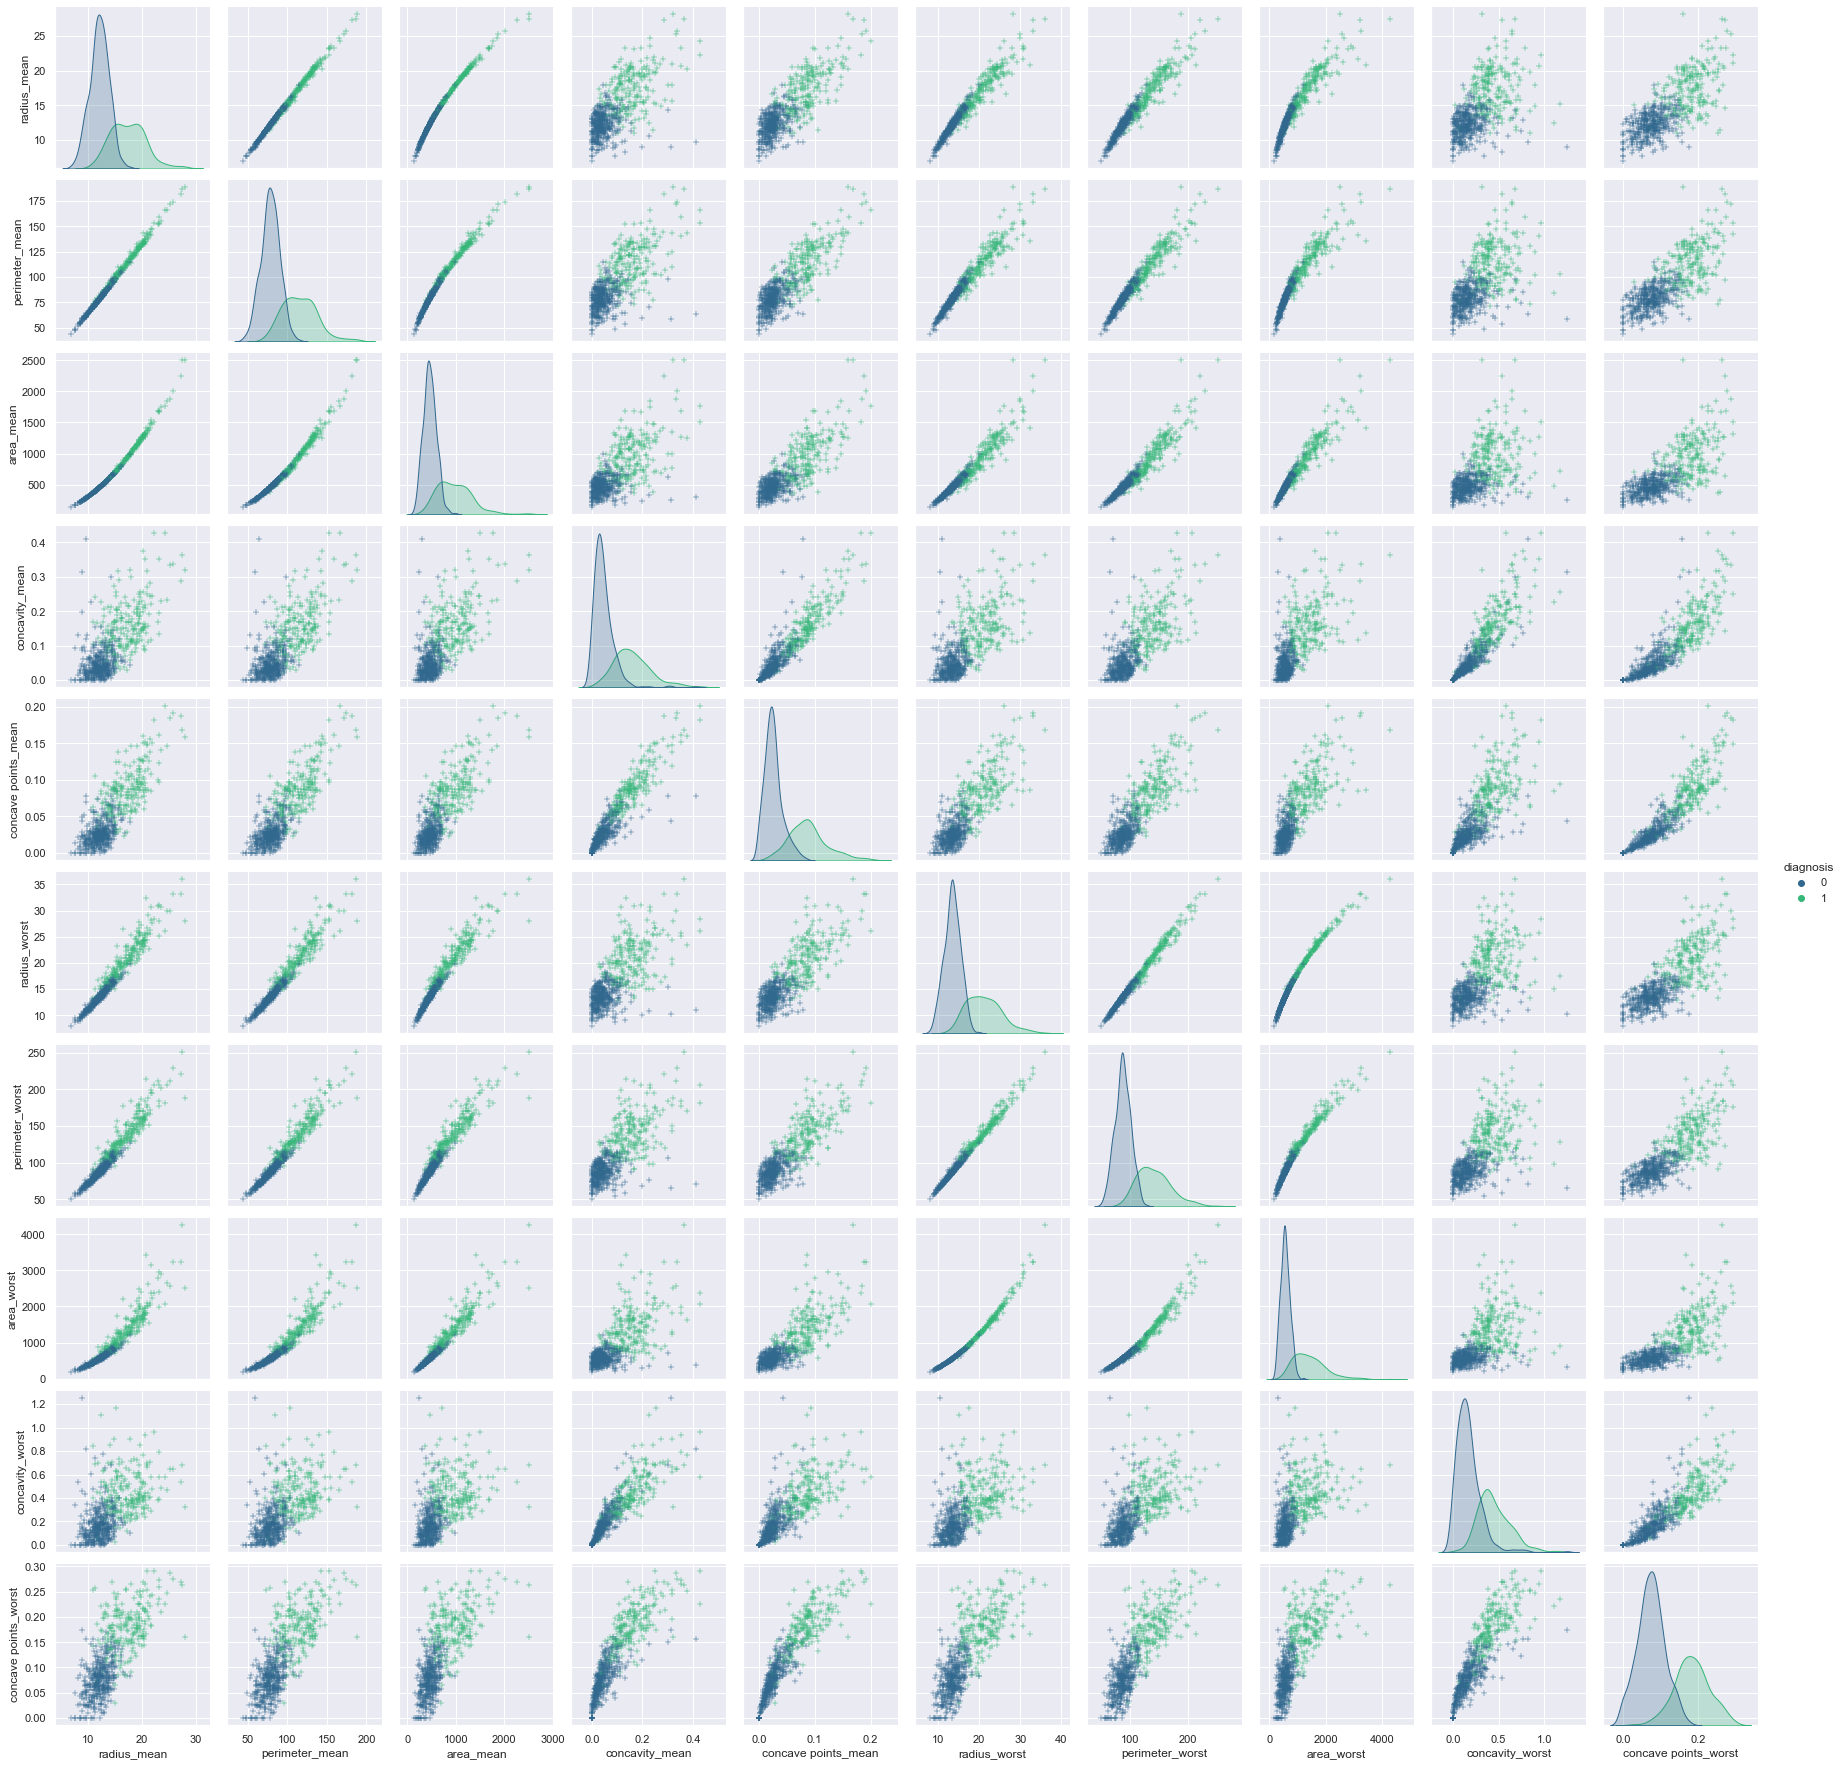

In [14]:
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show()

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [15]:
from sklearn.neighbors import LocalOutlierFactor

label = df["diagnosis"]
features = df.drop(["diagnosis", "id"],axis=1)
columns= df.columns.tolist()

lof = LocalOutlierFactor()
pred = lof.fit_predict(features)

In [16]:
x_score = lof.negative_outlier_factor_
radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score = pd.DataFrame({
    'score': x_score, 
    'radius': radius,
    'r': features.iloc[:,0],
    'a': features.iloc[:,4]
})

lofthreshold = -2.5
loffilter = outlier_score["score"]< lofthreshold
outlier_index = outlier_score[loffilter].index.tolist()

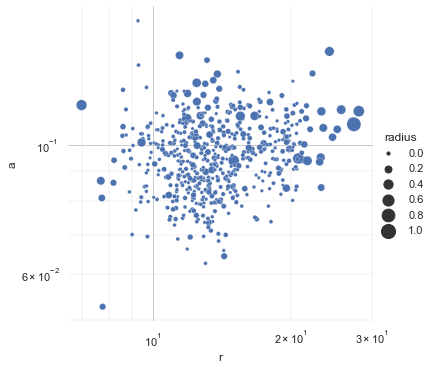

In [17]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=outlier_score,
    x="r", y="a",
    size="radius",
    palette=cmap, 
    sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [18]:
features4train = features.drop(outlier_index)
label4train = label.drop(outlier_index).values

## Trick 2

refer to: https://www.kaggle.com/rukayaamzat/97-accuracy-cancer-prediction-with-pipeline

In [69]:
features.columns.values

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [66]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

threshold = 0.001
selector = SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False), threshold=threshold).fit(features, label)

In [67]:
feature_names = features.columns.values
print("Features selected by SelectFromModel: "
      f"{feature_names[selector.get_support()]}")

Features selected by SelectFromModel: ['perimeter_mean' 'area_mean' 'area_se' 'texture_worst' 'area_worst']


## Trick 3

refer to: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html

这篇文章是sklearn给的关于特征选择的方案，可以参考

# Train

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features4train = scaler.fit_transform(features4train)

X_train,X_test,y_train,y_test=train_test_split(scaled_features4train, label4train, test_size=0.3, random_state=2021)

使用 https://github.com/hyperopt/hyperopt-sklearn 选择最好的模型和参数

## Select Models

In [86]:
from hpsklearn import HyperoptEstimator, random_forest, svc, knn, gradient_boosting
from hyperopt import hp

# clf = hp.pchoice( 'leewind', 
#           [ ( 0.2, random_forest('leewind.random_forest') ),
#             ( 0.2, svc('leewind.svc') ),
#             ( 0.3, knn('leewind.knn') ), 
#             ( 0.3, gradient_boosting('leewind.gradient_boosting'))
#           ]
#     )

clf = hp.pchoice( 'leewind', 
          [ 
            ( 1.0, gradient_boosting('leewind.gradient_boosting'))
          ]
    )

estim = HyperoptEstimator(classifier=clf,
                          preprocessing=any_preprocessing('preprocessing'),
                          algo=tpe.suggest,
                          max_evals=50,
                          trial_timeout=120)

In [87]:
estim.fit(X_train, y_train)

100%|██████████| 50/50 [00:01<00:00,  1.65s/trial, best loss: 0.012499999999999956]


In [88]:
print(estim.score(X_test, y_test))
print(estim.best_model())

0.9181286549707602
{'learner': GradientBoostingClassifier(learning_rate=0.01824937295189582, max_depth=None,
                           max_features=0.43550932098501227, n_estimators=23,
                           random_state=1, subsample=0.5581646247713695), 'preprocs': (PCA(n_components=20),), 'ex_preprocs': ()}


## Best Selection

In [33]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import tpe

estim = HyperoptEstimator(classifier=any_classifier('clf'),
                          preprocessing=any_preprocessing('preprocessing'),
                          algo=tpe.suggest,
                          max_evals=50,
                          trial_timeout=120)

In [34]:
estim.fit(X_train, y_train)

100%|██████████| 50/50 [00:01<00:00,  1.43s/trial, best loss: 0.0]


In [35]:
print(estim.score(X_test, y_test))
print(estim.best_model())

0.9649122807017544
{'learner': SVC(C=0.011036083103575421, cache_size=512, coef0=5.9505405694590285,
    degree=4.0, gamma=0.8646811635146919, kernel='poly', max_iter=33369923.0,
    random_state=0, shrinking=False, tol=0.0002697455993987152), 'preprocs': (Normalizer(norm='l1'),), 'ex_preprocs': ()}


In [36]:
from sklearn.svm import SVC

model = SVC(C=0.011036083103575421, cache_size=512, coef0=5.9505405694590285,
    degree=4.0, gamma=0.8646811635146919, kernel='poly', max_iter=33369923.0,
    random_state=0, shrinking=False, tol=0.0002697455993987152)

In [37]:
from sklearn.metrics import accuracy_score
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
acc

0.9473684210526315

**分类报告** 

这里可以着重标记，都可以用

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       106
           1       0.97      0.89      0.93        65

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



**混淆矩阵** https://www.zhihu.com/question/36883196

<AxesSubplot:>

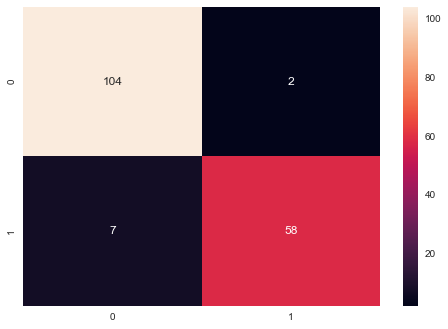

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot= True, fmt= 'g')

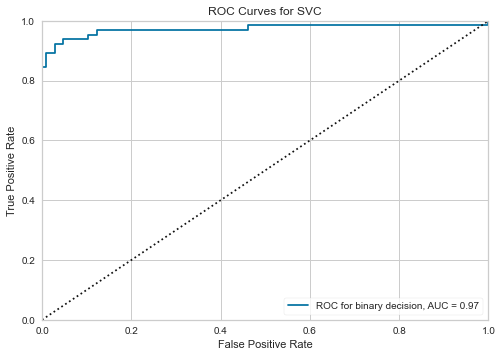

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model, classes=["M", "B"], micro=False, macro=False, per_class=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

+ 这组训练里面，它尝试用LocalOutlierFactor，把一些数据不密集区域的数据剔除，这样剩余的数据训练起来准确率就会很高。但是就只能预测这一块的数据不能更多。

# Train by whole data

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

XW_train,XW_test,yw_train,yw_test=train_test_split(scaled_features, label, test_size=0.3, random_state=2021)

In [40]:
estim.fit(XW_train, yw_train)

100%|██████████| 50/50 [00:01<00:00,  1.42s/trial, best loss: 0.0]


In [41]:
print(estim.score(XW_test, yw_test))
print(estim.best_model())

0.9532163742690059
{'learner': KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=6,
                     weights='distance'), 'preprocs': (PCA(n_components=4),), 'ex_preprocs': ()}


In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=6,
                     weights='distance')

In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score
model.fit(XW_train,yw_train)
predict = model.predict(XW_test)
acc = accuracy_score(yw_test, predict)
auc = roc_auc_score(yw_test, predict)

acc, auc

(0.9649122807017544, 0.9562646028037384)

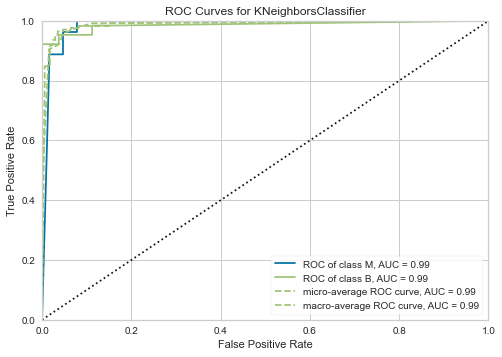

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model, classes=["M", "B"])

visualizer.fit(XW_train,yw_train)        # Fit the training data to the visualizer
visualizer.score(XW_test, yw_test)        # Evaluate the model on the test data
visualizer.show()

# PCA

https://www.kaggle.com/tanyildizderya/breast-cancer-eda-classification

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(scaled_features4train)
pca_scaled_features4train = pca.transform(scaled_features4train)

Text(0.5, 1.0, 'PCA: p1 vs p2')

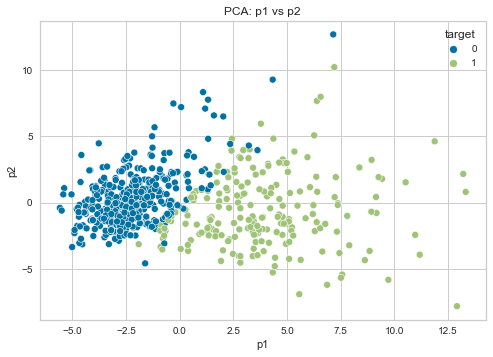

In [101]:
pca_data = pd.DataFrame(pca_scaled_features4train, columns = ["p1","p2"])
pca_data["target"] = label4train

sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")

In [104]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_scaled_features4train, label4train, test_size = 0.3, random_state = 2021)
estim.fit(X_train_pca, Y_train_pca)

100%|██████████| 50/50 [00:01<00:00,  1.84s/trial, best loss: 0.025000000000000022]


In [105]:
print(estim.best_model())

{'learner': GradientBoostingClassifier(learning_rate=0.009592816079042584, max_depth=2,
                           max_features='log2', min_samples_leaf=49,
                           n_estimators=128, random_state=4), 'preprocs': (StandardScaler(with_std=False),), 'ex_preprocs': ()}


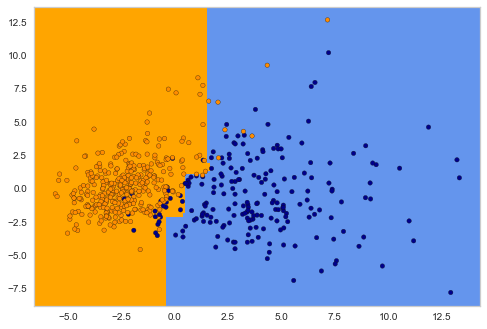

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.colors import ListedColormap

model = GradientBoostingClassifier(learning_rate=0.009592816079042584, max_depth=2,
                           max_features='log2', min_samples_leaf=49,
                           n_estimators=128, random_state=4)
model.fit(X_train_pca, Y_train_pca)

# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = pca_scaled_features4train
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure();
plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=label4train, cmap=cmap_bold,
            edgecolor='k', s=20);
plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());

# NCA

refer to: https://www.kaggle.com/tanyildizderya/breast-cancer-eda-classification

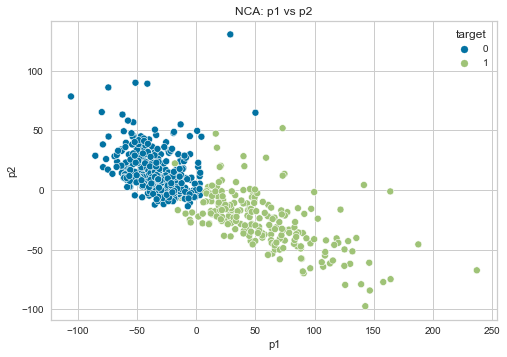

In [119]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(scaled_features4train, label4train)
nca_scaled_features4train = nca.transform(scaled_features4train)

nca_data = pd.DataFrame(nca_scaled_features4train, columns = ["p1","p2"])
nca_data["target"] = label4train

sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data);
plt.title("NCA: p1 vs p2");

In [122]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(nca_scaled_features4train, label4train, test_size = 0.3, random_state = 2021)
estim.fit(X_train_nca, Y_train_nca)

100%|██████████| 50/50 [00:01<00:00,  1.19s/trial, best loss: 0.0]


In [123]:
print(estim.best_model())

{'learner': GradientBoostingClassifier(learning_rate=0.1939666511941349, max_depth=None,
                           max_features=0.035030181468797106, n_estimators=111,
                           random_state=3, subsample=0.5599008382032171), 'preprocs': (PCA(n_components=2, whiten=True),), 'ex_preprocs': ()}


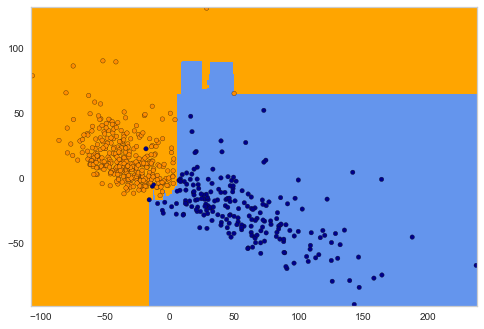

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.colors import ListedColormap

model = GradientBoostingClassifier(learning_rate=0.1939666511941349, max_depth=None,
                           max_features=0.035030181468797106, n_estimators=111,
                           random_state=3, subsample=0.5599008382032171)
model.fit(X_train_nca, Y_train_nca)

# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = nca_scaled_features4train
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure();
plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=label4train, cmap=cmap_bold,
            edgecolor='k', s=20);
plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());

# Reference

+ https://www.kaggle.com/rasheedaz/logistic-regression-mathematics-and-implementation
+ [Breast Cancer Classification](https://www.kaggle.com/niteshyadav3103/breast-cancer-classification#Extreme-Gradient-Boosting)